In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [30]:
data = np.load("/home/sam/projects/machine-learning/data/birds.npy")
print(data.shape)
print(data[:20, :])

(300, 2)
[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]
 [1.24792268 4.93267846]
 [1.97619886 4.43489674]
 [2.23454135 5.05547168]
 [2.98340757 4.84046406]
 [2.97970391 4.80671081]
 [2.11496411 5.37373587]
 [2.12169543 5.20854212]
 [1.5143529  4.77003303]
 [2.16979227 5.27435354]
 [0.41852373 4.88312522]
 [2.47053695 4.80418944]
 [4.06069132 4.99503862]
 [3.00708934 4.67897758]
 [0.66632346 4.87187949]
 [3.1621865  4.83658301]]



<h4>K-means is an iterative procedure that Starts by guessing the initial centroids, and then Refines this guess by:</h4>
         - Repeatedly assigning examples to their closest centroids, and then
         - Recomputing the centroids based on the assignments.

<h6>In pseudocode, the K-means algorithm is as follows:</h6>

      # Initialize centroids
      # K is the number of clusters
      centroids = kMeans_init_centroids(X, K)

      for iter in range(iterations):
          # Cluster assignment step: 
          # Assign each data point to the closest centroid. 
          # idx[i] corresponds to the index of the centroid 
          # assigned to example i
          idx = find_closest_centroids(X, centroids)

          # Move centroid step: 
          # Compute means based on centroid assignments
          centroids = compute_centroids(X, idx, K)


<h3>Implement K-means Algorithm</h3>

In [31]:
def centroid_init(X, K):
    indices = np.random.permutation(X.shape[0])
    centroids = X[indices[:K]]
    return centroids
cents = centroid_init(data, 6)
print(cents)
print(cents.shape)
print(type(cents))    

[[3.16109021 1.29422893]
 [5.91280273 2.85631938]
 [1.96547974 1.2173076 ]
 [2.94294356 1.02825076]
 [7.39807241 3.48487031]
 [6.80029526 3.17579578]]
(6, 2)
<class 'numpy.ndarray'>


In [32]:
def closest_centroids(X, centroids):
    
    K = centroids.shape[0]
    indices = np.zeros(X.shape[0], dtype=int)
    
    for i, x in enumerate(X):
        
        dist = np.zeros(K)
        for j, centroid in enumerate(centroids):
            
            dist[j] = np.sum(np.power(x - centroid, 2))
        indices[i] = np.argmin(dist)
        
    return indices

initial_centroids = np.array([[3,3], [6,2], [8,5]])

indices = closest_centroids(data, initial_centroids)
print(indices)
    

[0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


In [33]:
def compute_centroids(X, indices, K):
    
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        
        centroid = np.mean(X[indices == i], axis=0)
        centroids[i, :] = centroid
        
    return centroids

K = 3
centroids = compute_centroids(data, indices, K)
print(centroids)

[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [69]:
def compute_distortion(X, centroids, indices):
    distortion = 0
    for i, centroid in enumerate(centroids):
        distortion += np.sum(np.power(X[indices == i] - centroid, 2))
    return distortion

In [70]:
def fit(X, K, init_centroids=None, max_epochs=10):
    cost = []
    
    if init_centroids:
        centroids = init_centroids
    else:
        centroids = centroid_init(X, K)
    
    indices = np.zeros(X.shape[0])
    for i in range(max_epochs):

        print(f"K-Means Iteration: {i+1}")
        
        indices = closest_centroids(X, centroids)
        loss = compute_distortion(X, centroids, indices)
        cost.append(loss)
        centroids = compute_centroids(X, indices, K)
       
        
    return centroids, indices, cost


centroids, indices, cost = fit(X=data, K=3, max_epochs=10)

K-Means Iteration: 1
K-Means Iteration: 2
K-Means Iteration: 3
K-Means Iteration: 4
K-Means Iteration: 5
K-Means Iteration: 6
K-Means Iteration: 7
K-Means Iteration: 8
K-Means Iteration: 9
K-Means Iteration: 10


In [71]:
print(centroids)
print(indices)

[[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
[0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0]


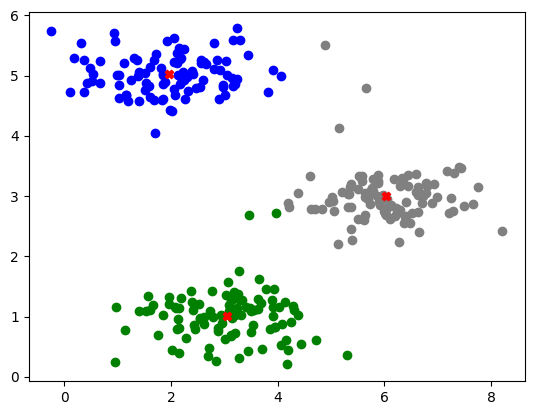

In [74]:
c0 = []
c1 = []
c2 = []

for i, index in enumerate(indices):
    if index == 0:
        c0.append(data[i])
    elif index == 1:
        c1.append(data[i])
    elif index == 2:
        c2.append(data[i])
        
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)

plt.scatter(c0[:, 0], c0[:, 1], color="blue")
plt.scatter(c1[:, 0], c1[:, 1], color="green")
plt.scatter(c2[:, 0], c2[:, 1], color="gray")
plt.scatter(centroids[:, 0], centroids[:, 1], color="red", marker="X")
plt.show()

[[ 7.03724598  8.57172412]
 [-2.35054314 -0.12095694]
 [ 7.43826626  6.04877748]
 ...
 [-9.15412467 -0.5848547 ]
 [ 7.45602414 10.24363649]
 [-8.12252307  0.42462486]]


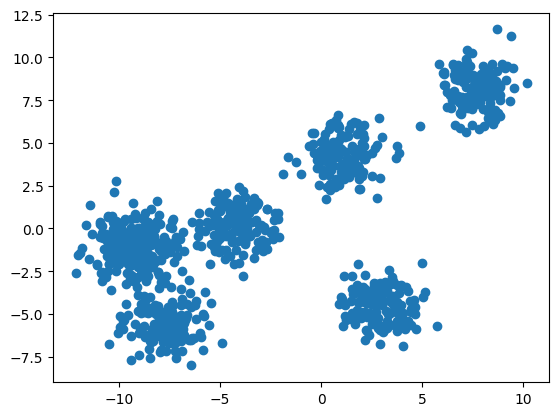

In [92]:
data1 = make_blobs(n_samples=1000, 
                   n_features=2, 
                   centers=7, 
                   cluster_std=1.0, 
                   center_box=(-10.0, 10.0), 
                   shuffle=True, 
                   random_state=3,
                   return_centers=True
                  )

print(data1[0])

plt.scatter(data1[0][:, 0], data1[0][:, 1])
plt.show()

In [93]:
X = data1[0]
centroids, indices, cost = fit(X=X, K=7, max_epochs=10)

K-Means Iteration: 1
K-Means Iteration: 2
K-Means Iteration: 3
K-Means Iteration: 4
K-Means Iteration: 5
K-Means Iteration: 6
K-Means Iteration: 7
K-Means Iteration: 8
K-Means Iteration: 9
K-Means Iteration: 10


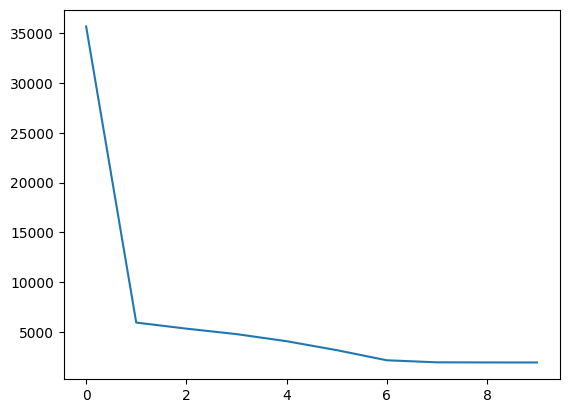

In [94]:
plt.plot(cost)
plt.show()

In [95]:
print(centroids)
print(indices)

[[-7.6133731  -6.15285729]
 [ 1.02954892  4.24699308]
 [-4.20061971  0.15871273]
 [-9.288847   -0.92352701]
 [-8.1262229  -4.11996987]
 [ 2.94041862 -4.51455008]
 [ 7.70798007  8.11771274]]
[6 2 6 3 1 1 3 6 0 3 2 3 3 2 3 3 2 5 3 4 6 0 3 3 2 3 3 1 5 2 5 2 2 6 4 2 3
 2 2 0 5 3 0 5 5 3 3 1 6 2 6 3 5 1 1 2 4 2 3 3 1 6 5 5 3 2 3 2 6 5 2 3 1 4
 3 3 2 2 5 2 5 4 6 5 2 3 6 5 1 6 1 3 4 2 0 5 2 1 3 3 5 0 3 1 0 2 5 6 3 5 2
 2 5 6 2 3 3 2 4 3 6 5 6 1 1 3 3 3 5 3 2 4 3 6 6 4 3 6 2 3 2 3 3 4 4 3 4 5
 2 4 3 1 3 1 6 2 6 1 4 3 5 1 3 3 6 1 3 0 3 5 2 6 3 3 1 1 3 6 0 6 2 3 1 3 0
 2 6 3 1 2 1 5 2 5 5 4 3 0 5 6 2 1 2 4 1 4 0 6 1 5 3 4 6 4 5 4 2 2 4 5 6 5
 1 1 1 1 2 6 6 2 3 1 3 2 5 6 2 4 0 5 5 0 1 3 5 5 2 4 5 5 0 0 3 6 6 2 2 3 3
 3 2 0 4 3 3 6 6 5 4 5 1 3 2 5 2 6 1 3 5 1 1 6 0 3 3 1 5 2 1 2 3 2 6 2 0 4
 1 2 3 1 2 3 0 3 4 4 5 0 3 5 1 2 0 4 0 1 2 2 3 1 1 0 1 1 5 3 2 3 1 6 5 3 5
 1 2 6 6 1 1 3 3 2 4 5 3 5 3 3 1 6 6 1 3 6 6 6 3 0 4 6 1 3 3 3 3 1 1 3 3 6
 4 5 3 2 3 3 1 2 2 3 5 3 6 0 4 0 1 1 5 4 4 2 5 2 2 3 0 2 0 0

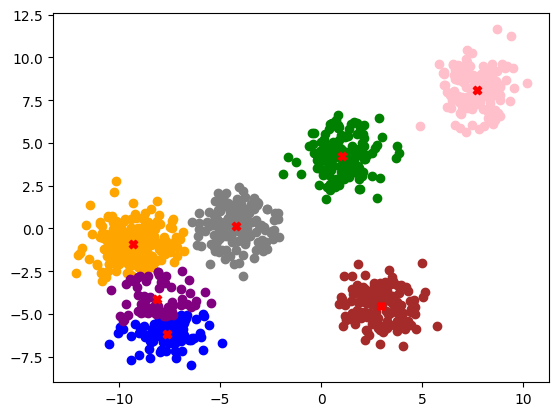

In [96]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []
c5 = []
c6 = []


for i, index in enumerate(indices):
    if index == 0:
        c0.append(X[i])
    elif index == 1:
        c1.append(X[i])
    elif index == 2:
        c2.append(X[i])
    elif index == 3:
        c3.append(X[i])
    elif index == 4:
        c4.append(X[i])
    elif index == 5:
        c5.append(X[i])
    elif index == 6:
        c6.append(X[i])
                
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)
c5 = np.array(c5)
c6 = np.array(c6)


plt.scatter(c0[:, 0], c0[:, 1], color="blue")
plt.scatter(c1[:, 0], c1[:, 1], color="green")
plt.scatter(c2[:, 0], c2[:, 1], color="gray")
plt.scatter(c3[:, 0], c3[:, 1], color="orange")
plt.scatter(c4[:, 0], c4[:, 1], color="purple")  
plt.scatter(c5[:, 0], c5[:, 1], color="brown")
plt.scatter(c6[:, 0], c6[:, 1], color="pink")

plt.scatter(centroids[:, 0], centroids[:, 1], color="red", marker="X")
plt.show()

<h3>K-Means on image pixels</h3>
<h4>Image Compression</h4>

(128, 128, 3)


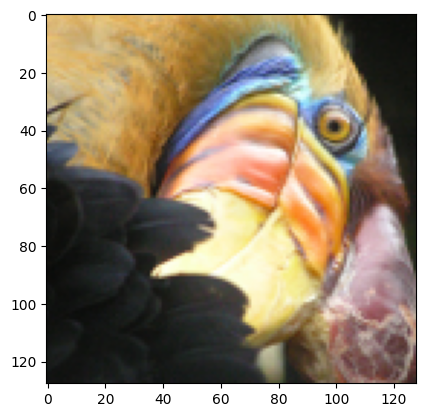

In [97]:
original_img = plt.imread('/home/sam/projects/machine-learning/data/bird_small.png')
plt.imshow(original_img)
print(original_img.shape)

In [99]:
X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
print(X_img.shape)

(16384, 3)


In [100]:
centroids, indices, cost = fit(X=X_img, K=16, max_epochs=10)

K-Means Iteration: 1
K-Means Iteration: 2
K-Means Iteration: 3
K-Means Iteration: 4
K-Means Iteration: 5
K-Means Iteration: 6
K-Means Iteration: 7
K-Means Iteration: 8
K-Means Iteration: 9
K-Means Iteration: 10


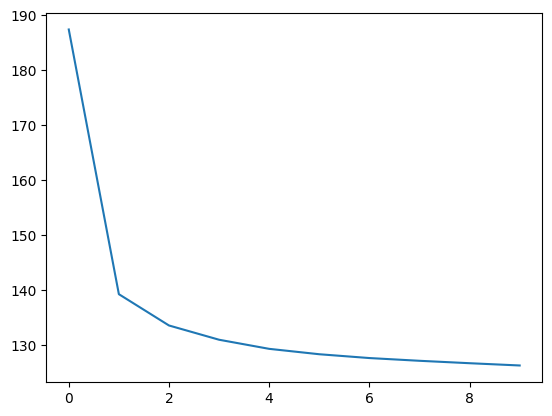

In [101]:
plt.plot(cost)

In [102]:
idx = closest_centroids(X_img, centroids)
X_recovered = centroids[idx, :] 
X_recovered = np.reshape(X_recovered, original_img.shape) 

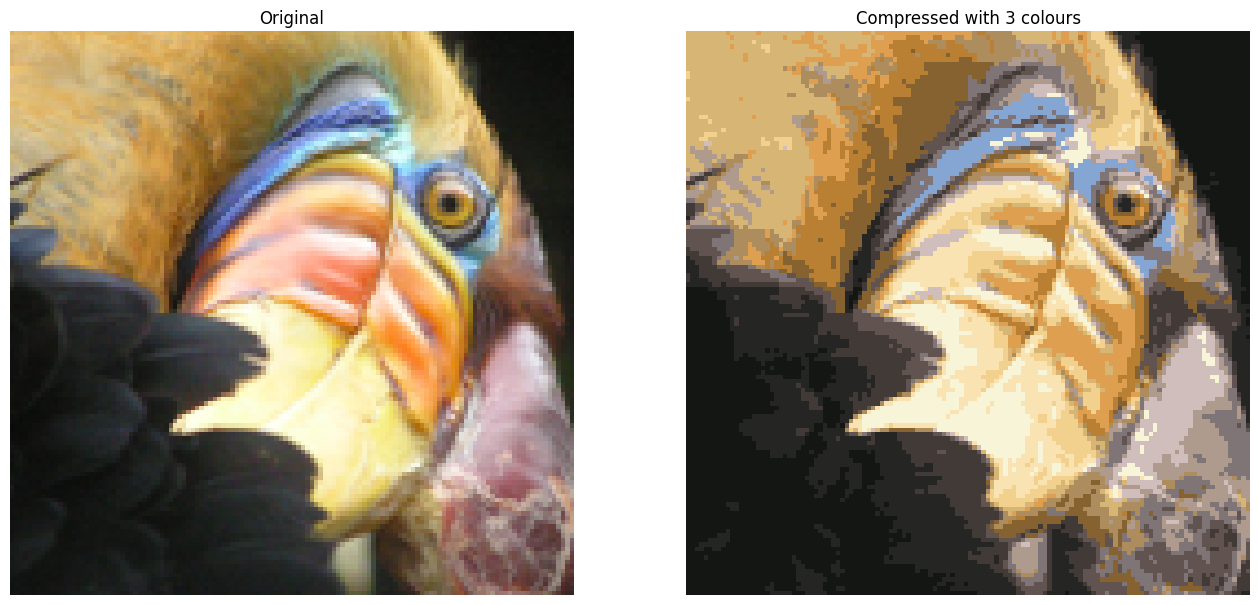

In [103]:
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()